In [1]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
pstims = []
os.chdir(r"C:\Users\ghakc\Desktop\Analysis\pstims")
pstim_filename_lists = [["703_4.npy", "703_5.npy"], ["703_20.npy"], ["703_21.npy", "703_43.npy"], ["703_45.npy"],    ["177_35.npy"], ["177_7.npy", "177_18.npy"], ["177_66.npy"], ["177_10.npy"]]

for pstim_filename_list in pstim_filename_lists:
    
    pstim = np.load(pstim_filename_list[0])
    if len(pstim_filename_list) > 1:
        pstim = np.append(pstim, np.load(pstim_filename_list[1]), axis = 2)
    # pstim = stats.zscore(pstim, axis = 3)
    pstims.append(pstim)
pstims[0].shape

(15, 5, 100, 16, 750)

In [130]:
# class wavelet:
#     def __init__(self):
#         t = np.arange(-1000, 1000)
#         self.real = np.cos(t) * np.exp(-t**2)
#         self.imag = np.sin(t)
#     def convolve(self, 

In [131]:
# t = np.arange(-2500, 5000, .1)
# gaussian = np.exp(-t**2)
# f_0 = 50
# fs = 24414
# mu = 0
# sigma_
# real = np.cos(f_0*t*2*np.pi/fs) * np.exp(-t**2 * 2*)

# x = t/25000
# plt.plot(x, real)


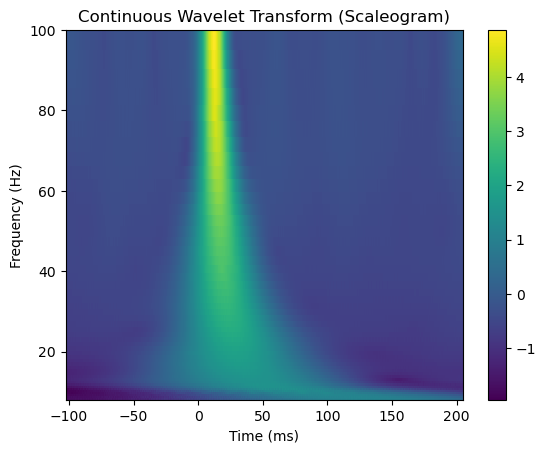

In [51]:
import pywt
sig = pstims[3][4, 4, 0, 6, :]
time = np.linspace(-250/2.4414, 500/2.4414, 750)

def wav_trans(sig):
    fs = 2441.4
    time = np.linspace(-250/24.414, 500/24.414, 750)
    frequencies = np.geomspace(8, 100, 50)/fs
    scale = pywt.frequency2scale('cmor1-1', frequencies)
    wav = pywt.ContinuousWavelet('cmor1-1')
    cwtmatr, freqs = pywt.cwt(sig, scale, wav, )
    freqs = freqs*fs
    cwtmatr = np.abs(cwtmatr[:-1, ..., :-1])
    return cwtmatr, freqs

fig, axs = plt.subplots(1, 1)

cwtmatr, freqs = wav_trans(sig)
cwtmatr = stats.zscore(cwtmatr, axis = -1)
pcm = axs.pcolormesh(time, freqs, cwtmatr)
# axs.set_yscale("log")
axs.set_xlabel("Time (ms)")
axs.set_ylabel("Frequency (Hz)")
axs.set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs)


In [60]:
cwtmatr.shape

(49, 749)

interactive(children=(Dropdown(description='experiment', options=(('10/2 | 703 ', 0), ('12/12 | 703', 1), ('12…

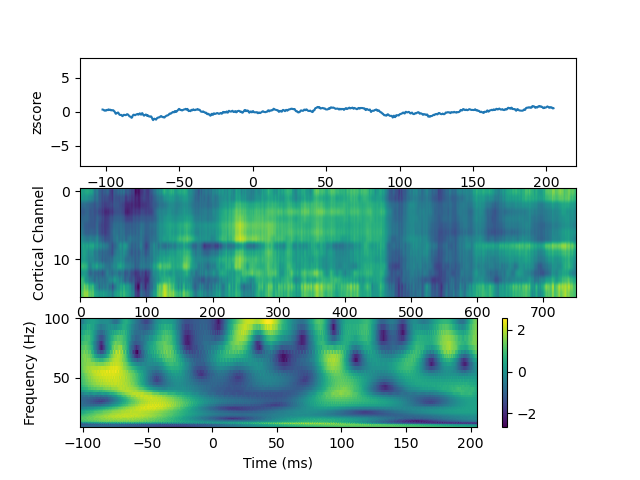

In [5]:
%matplotlib widget
from ipywidgets import *
from matplotlib.widgets import *
plt.close()

fig, axes = plt.subplots(nrows = 3, ncols = 1)


line1 = axes[0].plot(time, pstim[0, 0, 0, 0, :])[0]
image1 = axes[1].imshow(pstim[0, 0, 0, :, :], aspect='auto')

cwtmatr, freqs = wav_trans(sig)
cwtmatr = stats.zscore(cwtmatr, axis = -1)

pcm1 = axes[2].pcolormesh(time, freqs, cwtmatr)
# line2 = axes[2].plot(time[:-1], freqs[np.argmax(cwtmatr, axis = 0)], color = "red")

axes[0].set_ylabel("zscore")
axes[1].set_ylabel("Cortical Channel")
axes[0].set_xlabel("time [ms]")
axes[1].set_xlabel("sample")
# axes[2].set_yscale("log")
axes[2].set_xlabel("Time (ms)")
axes[2].set_ylabel("Frequency (Hz)")
cb = fig.colorbar(pcm1, ax=axes[2])

axes[0].set_ylim(-8, 8)
def update1(experiment = [("10/2 | 703 ", 0), ("12/12 | 703", 1), ("12/18 | 703", 2), ("12/20 | 703", 3), ("10/2 | 177", 4), ("12/12 | 177", 5), ("12/18 | 177", 6), ("12/20 | 177", 7)],  vchan = widgets.IntSlider(min=0, max=14, step=1), stim_amp=widgets.IntSlider(min=0, max=pstim.shape[1]-1, step=1), trial = widgets.IntSlider(min=0, max=pstim.shape[2]-1, step=1), cort_chan = widgets.IntSlider(min=0, max=pstim.shape[3]-1, step=1)):
    line1.set_ydata(pstims[experiment][vchan, stim_amp, trial, cort_chan, :])
    image1.set(data = pstims[experiment][vchan, stim_amp, trial, :, :])
    
    cwtmatr, freqs = wav_trans(pstims[experiment][vchan, stim_amp, trial, cort_chan, :])
    cwtmatr = stats.zscore(cwtmatr, axis = -1)
    
    pcm1.set(array = cwtmatr)
    pcm1.set(clim = [cwtmatr.min(), cwtmatr.max()])
    # line2[0].set_ydata(freqs[np.argmax(cwtmatr, axis = 0)])
    print(np.unravel_index(np.argmax(cwtmatr), cwtmatr.shape))
    fig.canvas.draw_idle()
    
interact(update1);

In [9]:
pstim.shape
cwtmatr_list = []

for pstim in [pstims[3], pstims[7]]:
    cwtmatr_array = np.zeros((49, 15, 50, 16, 749)) 
    for vchan in range(cwtmatr_array.shape[1]):
    # for amp in range(cwtmatr_array.shape[2]):
        for trial in range(cwtmatr_array.shape[2]):
            for cortchan in range(cwtmatr_array.shape[3]):
                cwtmatr_array[:, vchan, trial, cortchan, :] = wav_trans(pstim[vchan, 4, trial, cortchan])[0]
    cwtmatr_list.append(cwtmatr_array)

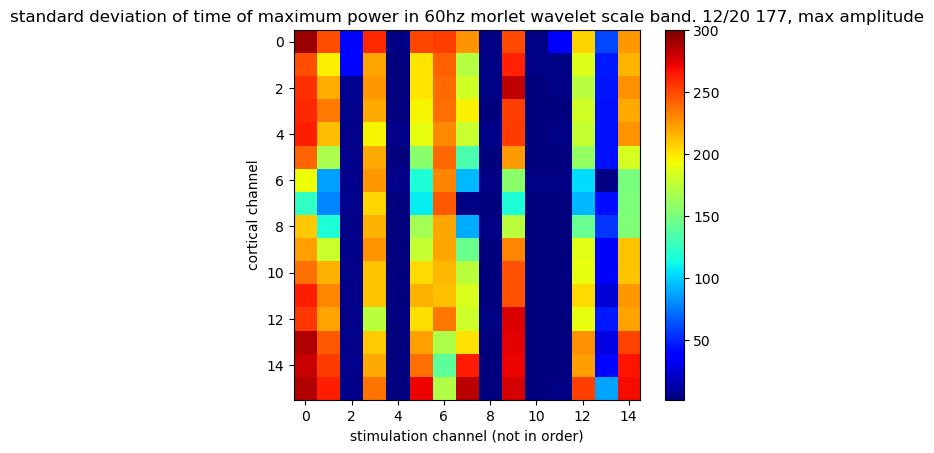

In [10]:
%matplotlib inline
plt.close()

stds = np.std(np.argmax(cwtmatr_list[1][35, :, :, :, :], axis = -1), axis = 1)
plt.title("standard deviation of time of maximum power in 60hz morlet wavelet scale band. 12/20 177, max amplitude")
plt.ylabel("cortical channel")
plt.xlabel("stimulation channel (not in order)")
plt.imshow(stds.T, vmax=300, cmap = "jet")
plt.colorbar()

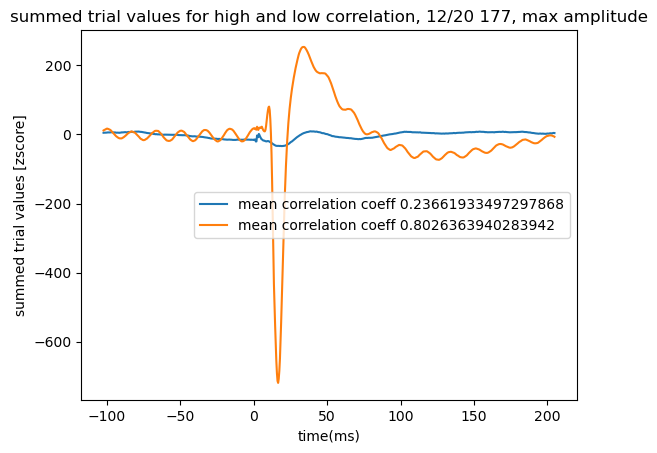

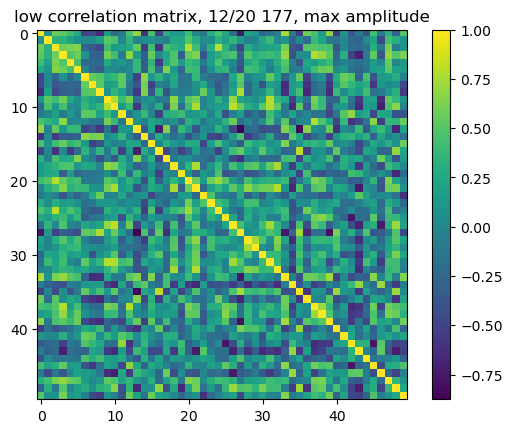

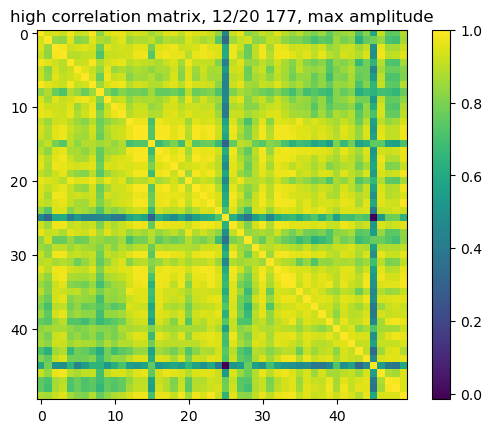

In [12]:
%matplotlib inline
pstims[3][3, 4, :, 14, :].sum(axis = 0)

low_corr = pstims[7][9, 4, :, 2, :].sum(axis = 0)

high_corr = pstims[7][4, 4, :, 13, :].sum(axis = 0)


plt.close()
plt.plot(time, low_corr)
plt.plot(time, high_corr)
plt.title("summed trial values for high and low correlation, 12/20 177, max amplitude")
plt.legend(["mean correlation coeff " +str(np.corrcoef(pstims[3][3, 4, :, 0, :]).mean()), "mean correlation coeff " + str(np.corrcoef(pstims[3][4, 4, :, 9, :]).mean())])
plt.ylabel("summed trial values [zscore]")
plt.xlabel("time(ms)")
plt.show()

plt.title("low correlation matrix, 12/20 177, max amplitude")
plt.imshow(np.corrcoef(pstims[7][9, 4, :, 2, :]))
plt.colorbar()
plt.show()
plt.imshow(np.corrcoef(pstims[7][4, 4, :, 13, :]))
plt.title("high correlation matrix, 12/20 177, max amplitude")

plt.colorbar()
plt.show()


In [68]:
corr_list = []
stds_list = []
for pstim, cwmatr_array in zip([pstims[3], pstims[7]], cwtmatr_list):
    print(cwmatr_array[0, 0, 0, 0, 0])
    stds = np.std(np.argmax(cwmatr_array[10, :, :, :, :], axis = -1), axis = 1)
    print(stds[0])
    corr_coefs = np.zeros(stds.shape)
    for vchan in range(pstim.shape[0]):
        for cchan in range(pstim.shape[-2]):
            corr_coefs[vchan, cchan] = np.mean(np.triu(np.corrcoef(pstim[vchan, 4, :, cchan, :]), k=0))
    corr_list.append(corr_coefs)
    stds_list.append(stds)

5.067545704519922
[202.42848021 188.47471555 203.45311106 184.33663119 190.96029849
 235.60779359 207.0535013  199.0692151  210.2968616  193.6404875
 214.34070449 201.776514   201.65324793 205.18452573 200.52302511
 201.63127238]
1.4276691068279033
[169.47200359 149.66695828 157.49306143 161.61163324 172.66896536
 166.10881855 156.66775546 138.39714592 140.02167832 137.11473881
 148.69412362 163.90549106 162.00830719 186.88220461 200.82977468
 218.65344726]


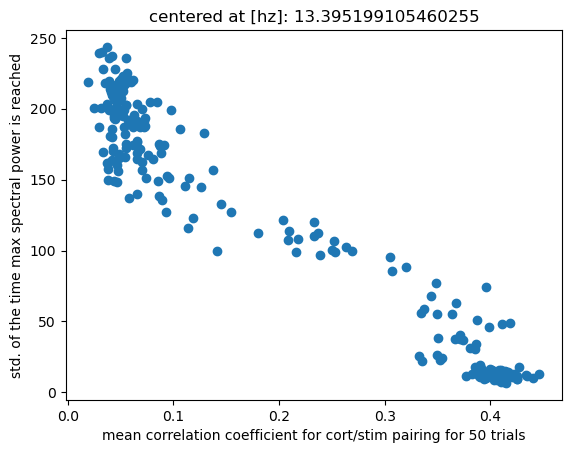

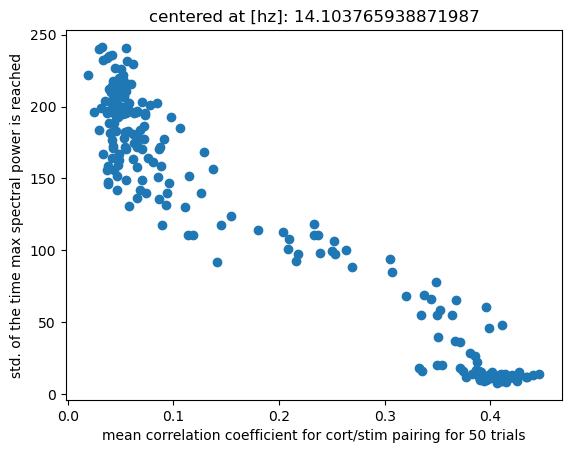

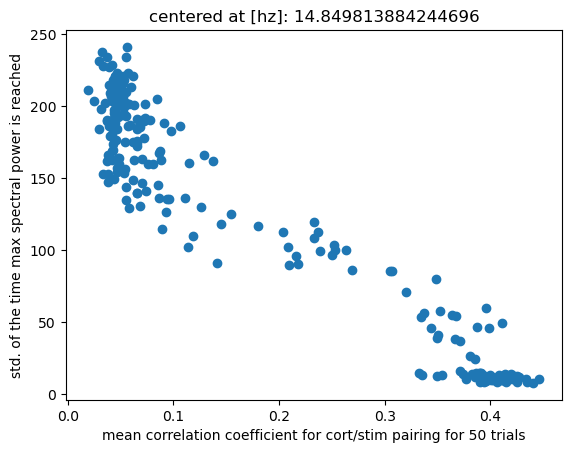

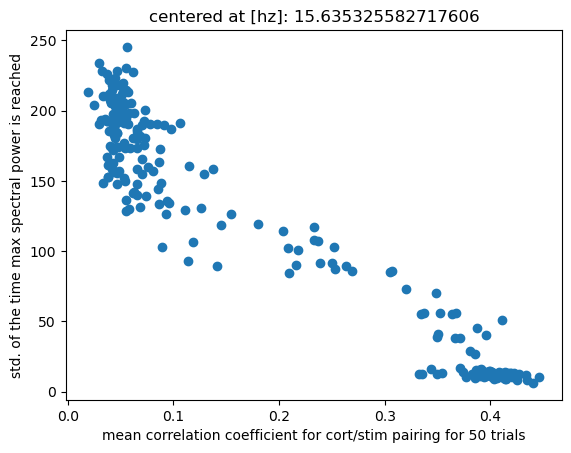

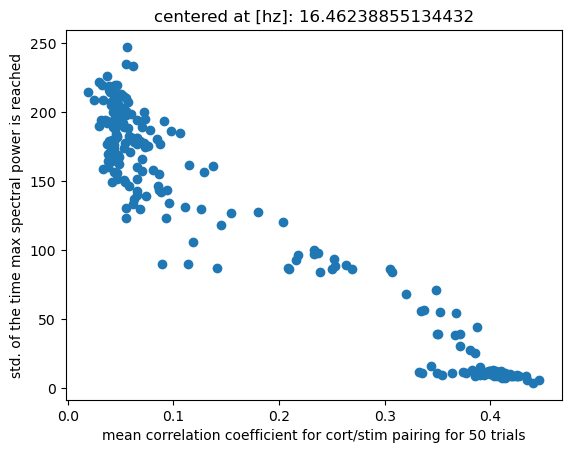

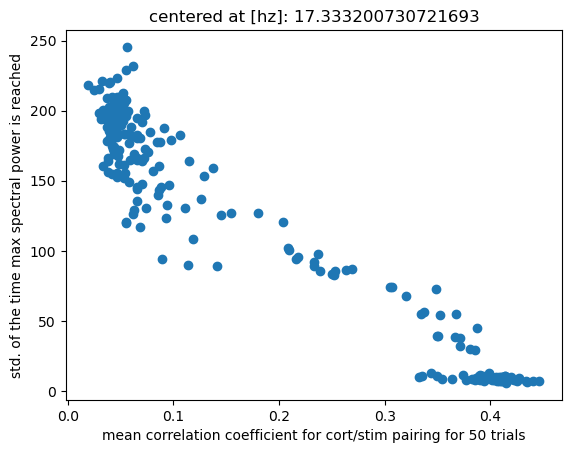

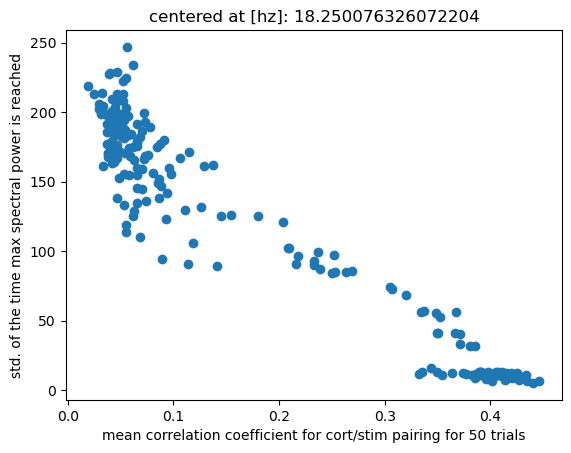

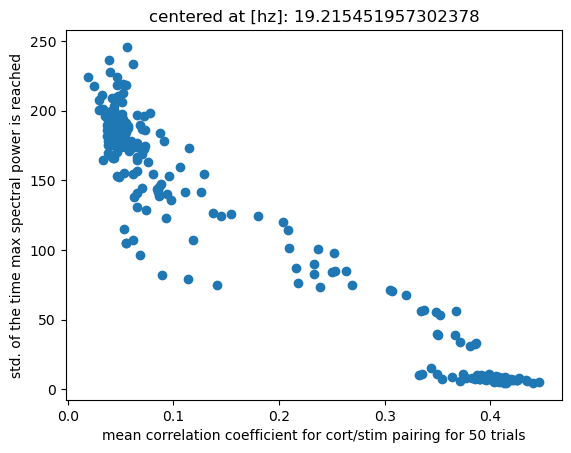

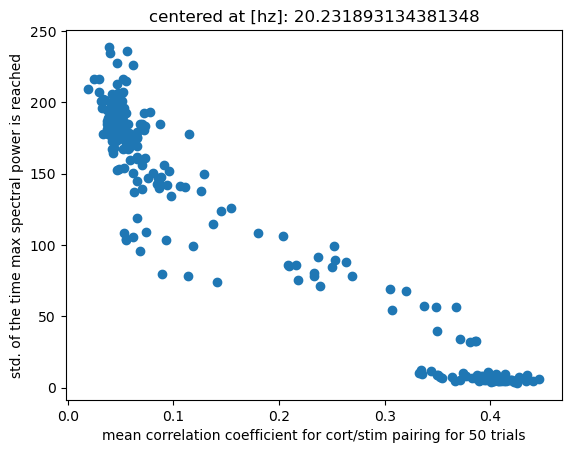

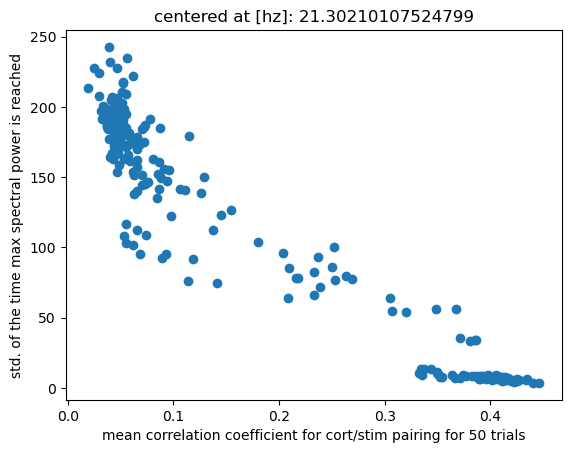

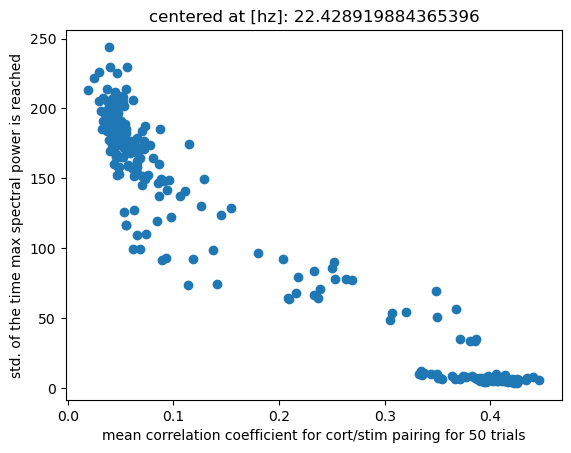

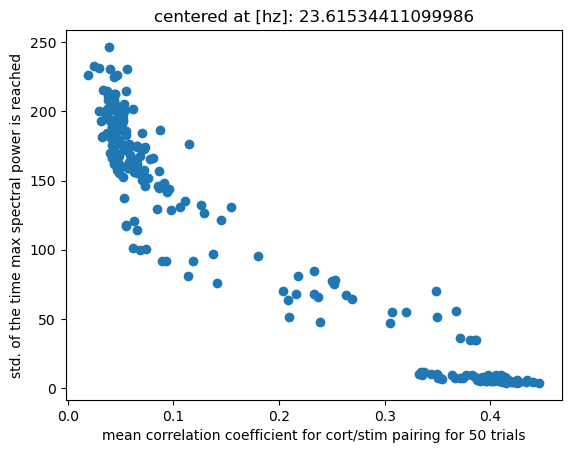

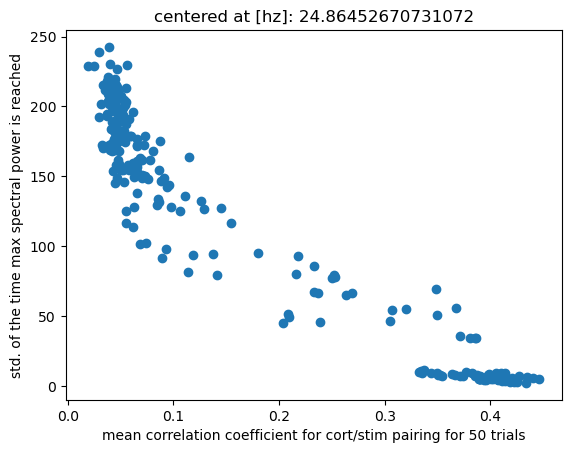

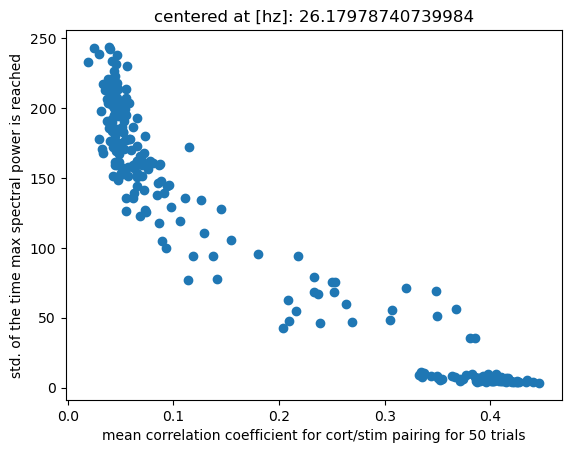

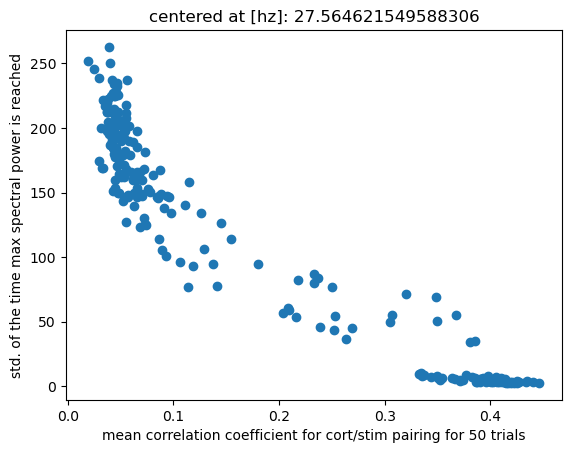

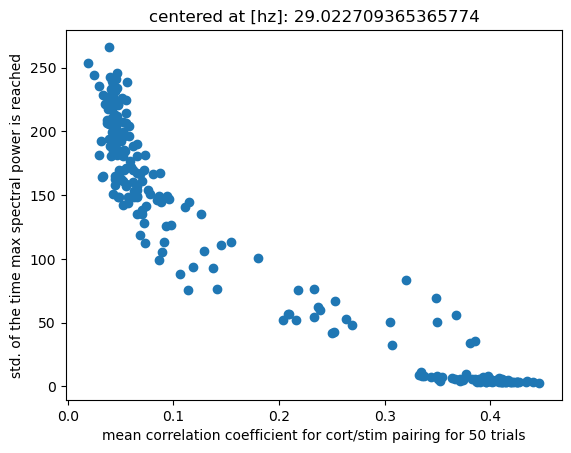

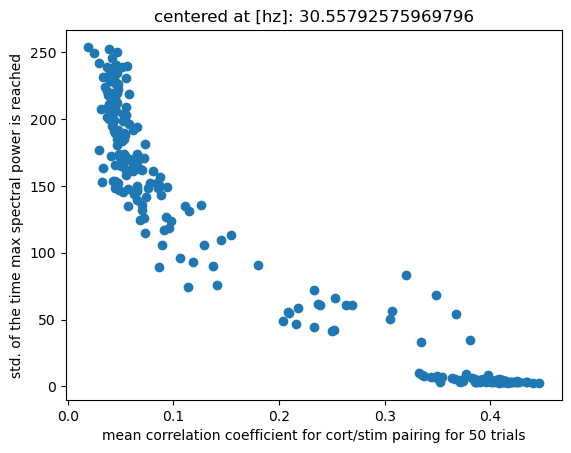

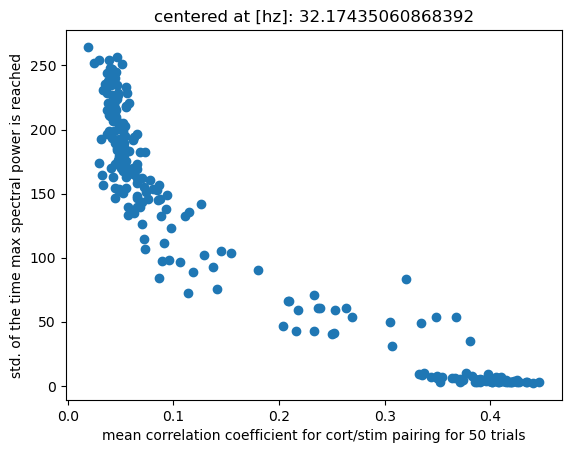

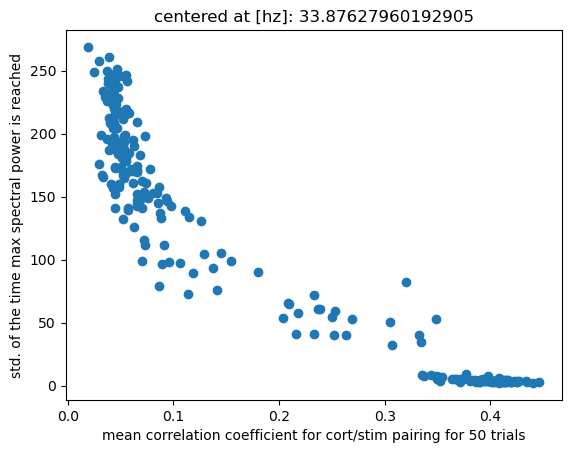

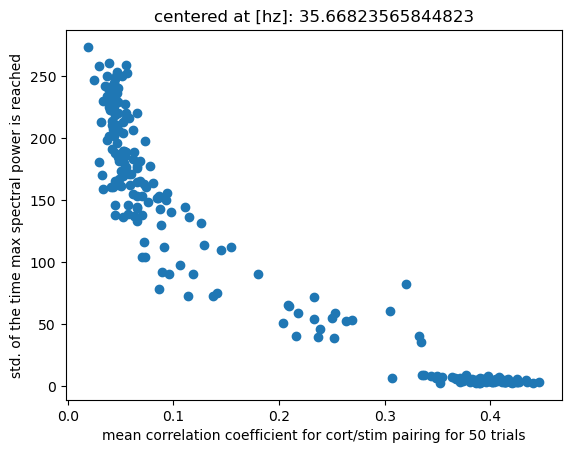

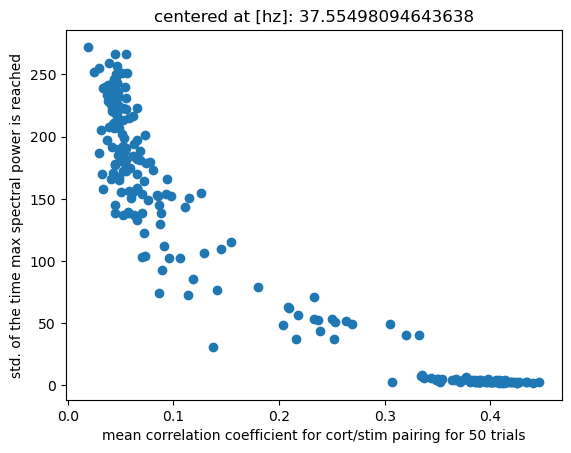

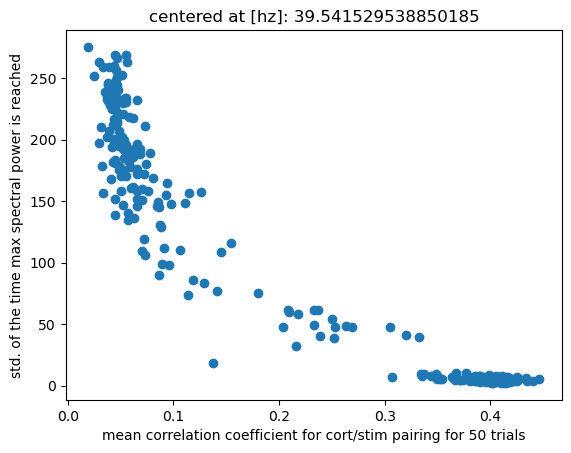

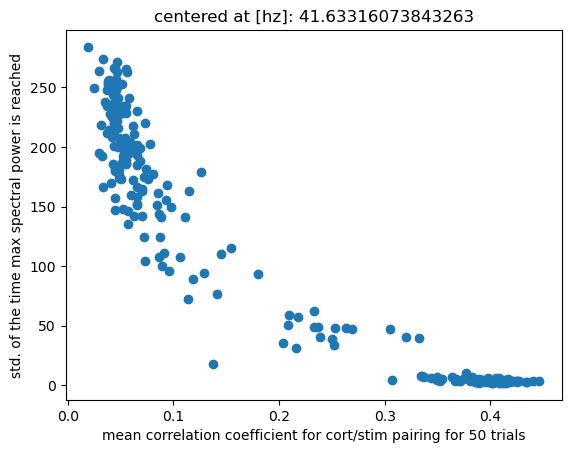

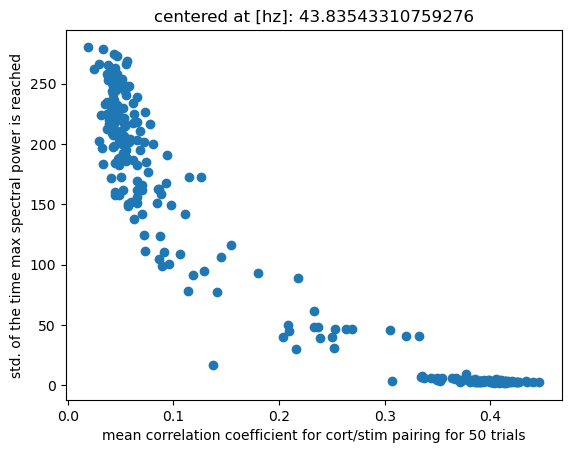

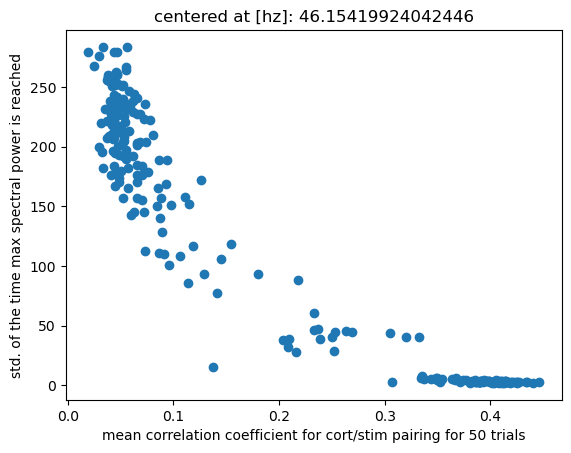

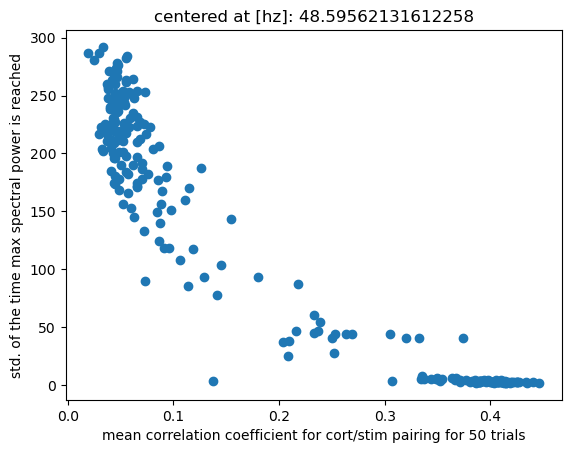

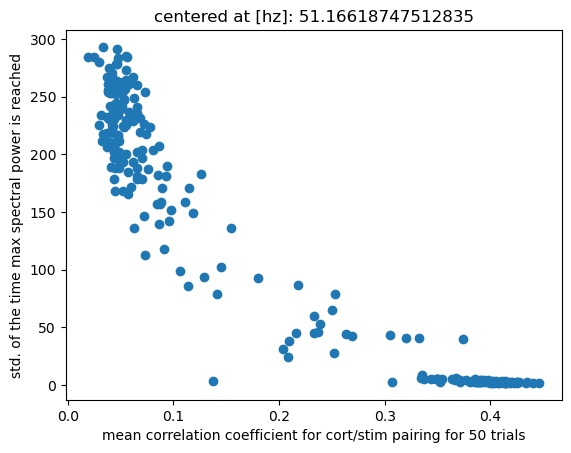

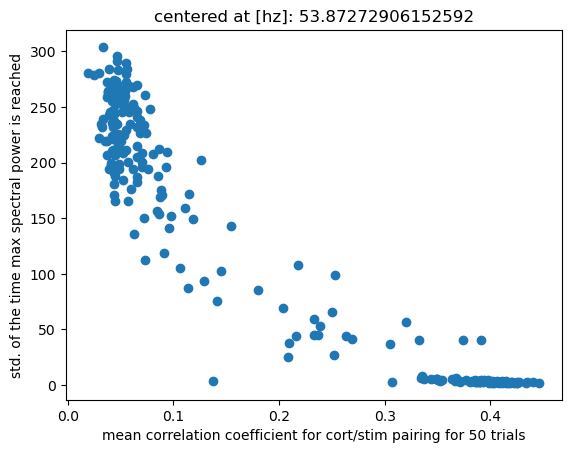

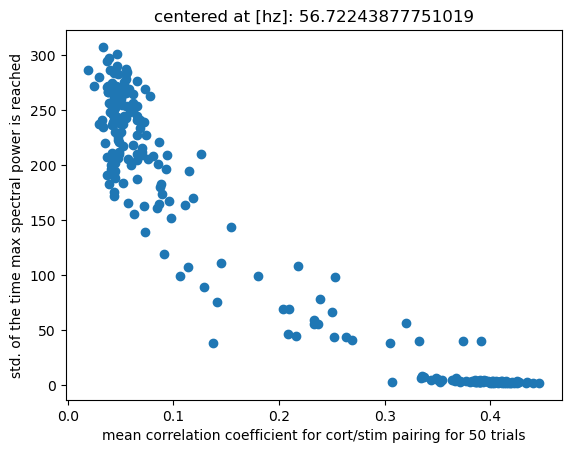

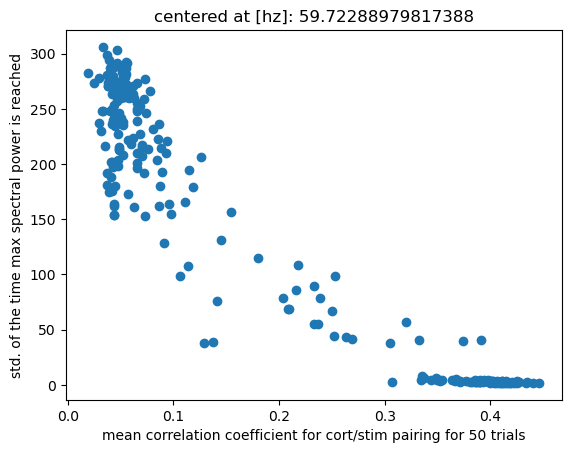

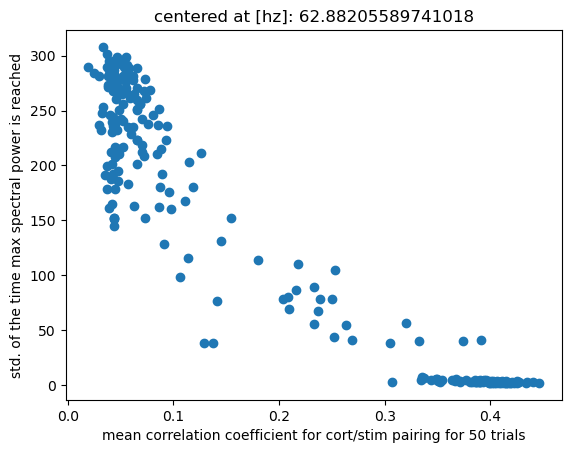

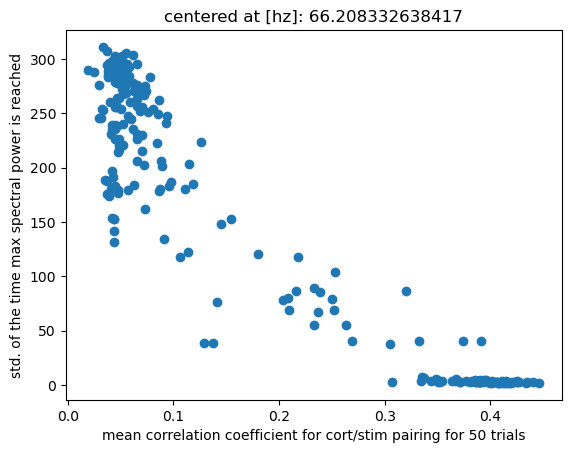

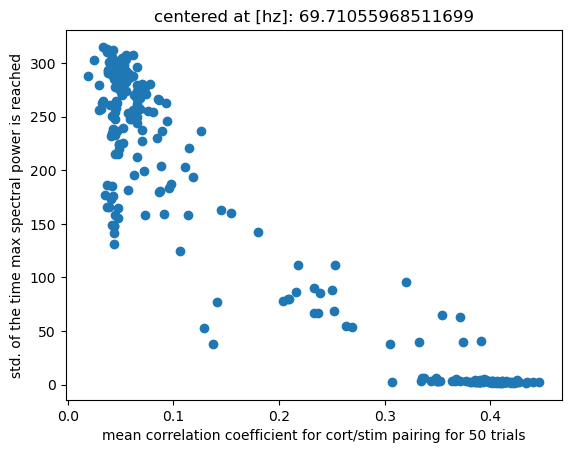

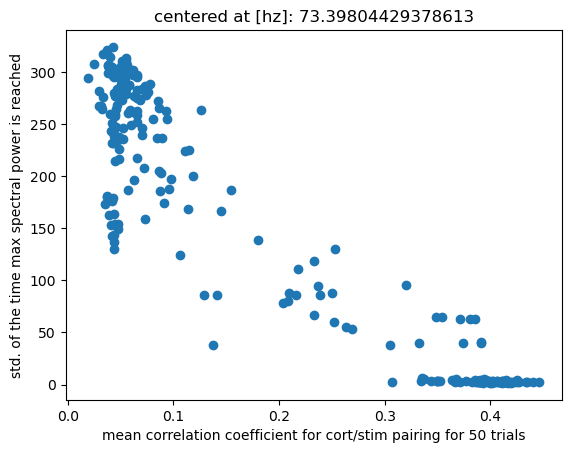

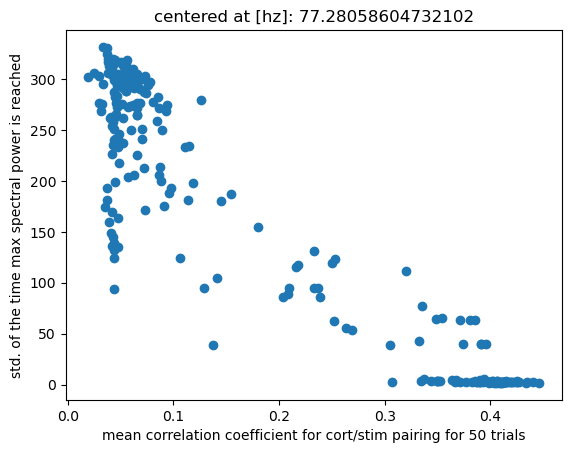

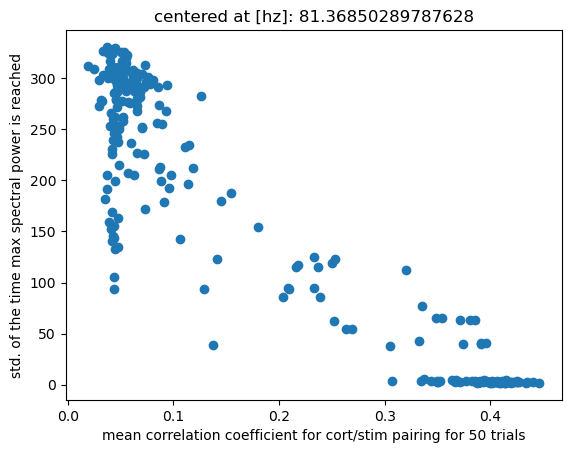

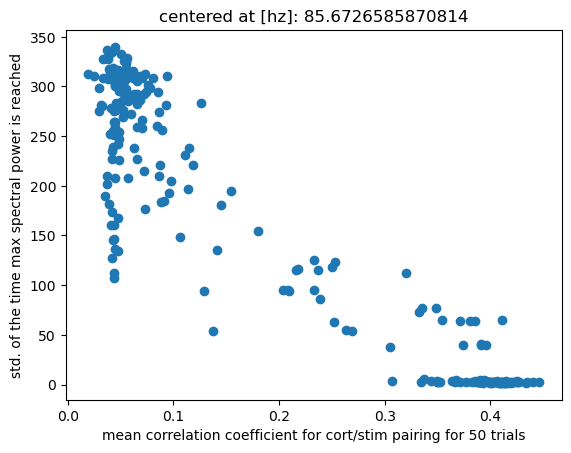

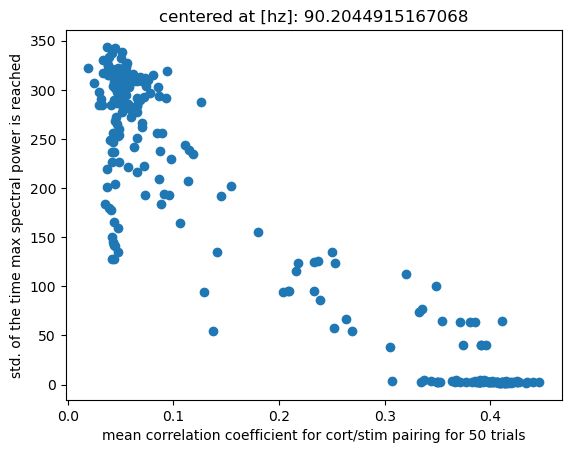

In [76]:
for i in range(10, 48):
    corr_list = []
    stds_list = []
    for pstim, cwmatr_array in zip([pstims[3], pstims[7]], cwtmatr_list):
        stds = np.std(np.argmax(cwmatr_array[i, :, :, :, :], axis = -1), axis = 1)
        corr_coefs = np.zeros(stds.shape)
        for vchan in range(pstim.shape[0]):
            for cchan in range(pstim.shape[-2]):
                corr_coefs[vchan, cchan] = np.mean(np.triu(np.corrcoef(pstim[vchan, 4, :, cchan, :]), k=0))
        corr_list.append(corr_coefs)
        stds_list.append(stds)
    plt.scatter(corr_list[1].reshape(-1), stds_list[1].reshape(-1))
    plt.title("centered at [hz]: " + str(freqs[i]))
    plt.xlabel("mean correlation coefficient for cort/stim pairing for 50 trials")
    plt.ylabel("std. of the time max spectral power is reached")
    plt.show();

In [67]:
freqs[10]

13.395199105460255